In [1]:
# standard libraries
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal, norm
from scipy import linalg, stats
import time
import importlib
from particles import resampling as rs
import sys
sys.path.append('..')

import GaussianMixtureAlgorithms as algo
import utils as u
importlib.reload(algo)
importlib.reload(u)

<module 'utils' from '/Users/francescacrucinio/Documents/PAPERS/SUBMITTED/SMC-WFR/GaussianMixture/../utils.py'>

In [2]:
d = 2

In [3]:
d = 2
w1 = 1/3
w2 = 1/6
w3 = 1/3
w4 = 1-w1-w2-w3

weights = np.array([w1, w2, w3, w4])
ms = np.array([3*np.ones(d), np.array([9, 10]), 2*np.ones(d), np.array([10, 4])])
Sigmas = np.array([0.7*np.array([[1, -.8377], [-.8377, 1]]), 0.7*np.array([[1, .8377], [.8377, 1]]), 
                  0.7*np.array([[1, -.8377], [-.8377, 1]]), 2*np.array([[1, -.6701], [-.6701, 1]])])
mu0 = np.zeros(d)
Sigma0 = np.eye(d)

Sigmas_inv = np.array([linalg.inv(Sigmas[0,:,:]), linalg.inv(Sigmas[1,:,:]), linalg.inv(Sigmas[2,:,:]), linalg.inv(Sigmas[3,:,:])])

In [4]:
x, y = np.mgrid[0:15:.01, 0:15:.01]
data = np.dstack((x, y))
z = 0
for j in range(weights.size):
    z += weights[j]*multivariate_normal.pdf(data, ms[j,:], Sigmas[j,:,:])


In [5]:
true_mean = np.sum(ms * weights[:, np.newaxis], axis = 0)
true_variance = np.zeros((weights.size, d, d))
for i in range(weights.size):
    true_variance[i, :] = Sigmas[i, :, :] + np.matmul((ms[i, :] - true_mean)[:, None], (ms[i, :] - true_mean)[:, None].T)
    true_variance[i, :] = weights[i]*true_variance[i, :]
true_variance = np.sum(true_variance, axis = 0)

## Algorithms

In [6]:
N = 300
X0 = np.random.multivariate_normal(np.zeros(d), np.eye(d), size = N)
gamma = 0.2
Niter = 1000

In [7]:
component = np.random.randint(weights.size, size = N)
true_sample = np.zeros((N, d))
for n in range(N):
      true_sample[n, :] = np.random.multivariate_normal(ms[component[n], :], Sigmas[component[n], :, :], size = 1)[0]

In [8]:
Ks = np.array([1, 5, 10, 20, 50])
Ksize = Ks.size

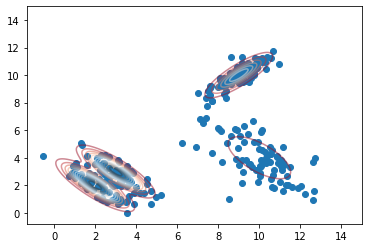

In [9]:
plt.contour(x, y, z, 15, cmap='RdGy', alpha = 0.5)
plt.scatter(true_sample[:,0], true_sample[:,1]);

In [10]:
gamma_smcmala = 0.22

In [11]:
Niter_fr = Niter
Niter_smcula = Niter
Niter_smcmala = Niter

In [12]:
Nalgo = 4
Nrep = 1

fr_x = np.zeros((Ksize, Nrep, Niter_fr, d, N))
fr_w = np.zeros((Ksize, Nrep, Niter_fr, N))
wfr_x = np.zeros((Ksize, Nrep, Niter, d, N))
wfr_w = np.zeros((Ksize, Nrep, Niter, N))
smcula_x = np.zeros((Ksize, Nrep, Niter_smcula, d, N))
smcula_w = np.zeros((Ksize ,Nrep, Niter_smcula, N))
smcmala_x = np.zeros((Ksize, Nrep, Niter_smcmala, d, N))
smcmala_w = np.zeros((Ksize, Nrep, Niter_smcmala, N))

runtime = np.zeros((Ksize, Nrep, Nalgo))

In [13]:
for k in range(Ksize):
    nmcmc = Ks[k]
    for i in range(Nrep):
        ## SMC-FR
        start = time.time()
        fr_x[k, i,:], fr_w[k, i,:] = algo.SMC_UnitFR(gamma, Niter_fr, ms, Sigmas, weights, X0, nmcmc)
        end = time.time()
        runtime[k, i, 0] = end-start
        ### SMC-WFR
        start = time.time()
        wfr_x[k, i,:], wfr_w[k, i,:] = algo.SMC_WFR(gamma, Niter, ms, Sigmas, Sigmas_inv, weights, X0, nmcmc)
        end = time.time()
        runtime[k, i, 1] = end-start
        ### SMC-ULA
        start = time.time()
        smcula_x[k, i,:], smcula_w[k, i,:] = algo.SMC_ULA(gamma, Niter_smcula, ms, Sigmas, Sigmas_inv, weights, X0, nmcmc)
        end = time.time()
        runtime[k, i, 2] = end-start
        ### SMC-MALA
        start = time.time()
        smcmala_x[k, i,:], smcmala_w[k, i,:], accepted_smcmala = algo.SMC_MALA(gamma_smcmala, Niter_smcmala, ms, Sigmas, Sigmas_inv, weights, X0, nmcmc)
        end = time.time()
        runtime[k, i, 3] = end-start

/Users/francescacrucinio/Documents/PAPERS/SUBMITTED/SMC-WFR/GaussianMixture/GaussianMixtureAlgorithms.py:24: RuntimeWarning: divide by zero encountered in log
  return np.log(np.sum(logpi, axis = 0))
/Users/francescacrucinio/Documents/PAPERS/SUBMITTED/SMC-WFR/GaussianMixture/GaussianMixtureAlgorithms.py:24: RuntimeWarning: divide by zero encountered in log
  return np.log(np.sum(logpi, axis = 0))
/Users/francescacrucinio/Documents/PAPERS/SUBMITTED/SMC-WFR/GaussianMixture/GaussianMixtureAlgorithms.py:24: RuntimeWarning: divide by zero encountered in log
  return np.log(np.sum(logpi, axis = 0))
/Users/francescacrucinio/Documents/PAPERS/SUBMITTED/SMC-WFR/GaussianMixture/GaussianMixtureAlgorithms.py:24: RuntimeWarning: divide by zero encountered in log
  return np.log(np.sum(logpi, axis = 0))
/Users/francescacrucinio/Documents/PAPERS/SUBMITTED/SMC-WFR/GaussianMixture/GaussianMixtureAlgorithms.py:24: RuntimeWarning: divide by zero encountered in log
  return np.log(np.sum(logpi, axis = 0))


In [14]:
np.mean(np.sum(accepted_smcmala, axis = 0)/Niter_smcmala)

0.5747420408163265

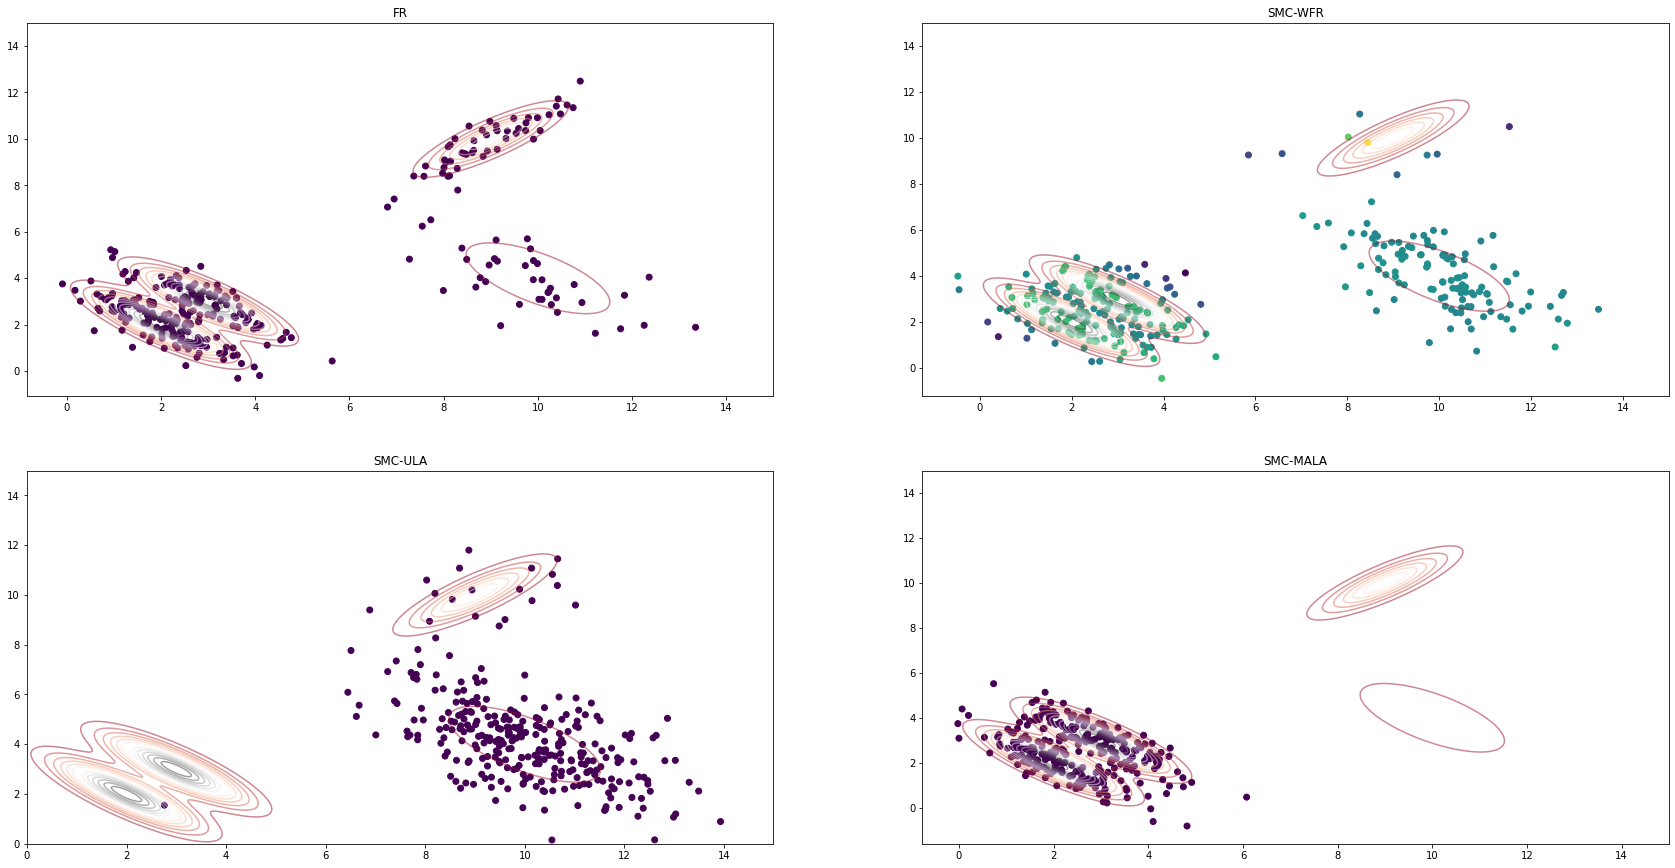

In [15]:
k = 4
i = Nrep-1
plt.figure(figsize = (12,6))
plt.subplot(2, 2, 1)
plt.contour(x, y, z, 15, cmap='RdGy', alpha = 0.5)
plt.scatter(fr_x[k, i, -1, 0, :], fr_x[k, i, -1, 1, :], c = fr_w[k, i, -1, :]);
plt.title('FR')
plt.subplot(2, 2, 2)
plt.contour(x, y, z, 15, cmap='RdGy', alpha = 0.5)
plt.scatter(wfr_x[k, i, -1, 0, :], wfr_x[k, i, -1, 1, :], c = wfr_w[k, i, -1, :]);
plt.title('SMC-WFR')
plt.subplot(2, 2, 3)
plt.contour(x, y, z, 15, cmap='RdGy', alpha = 0.5)
plt.scatter(smcula_x[k, i, -1, 0, :], smcula_x[k, i, -1, 1, :], c = smcula_w[k, i, -1, :]);
plt.title('SMC-ULA')
plt.subplot(2, 2, 4)
plt.contour(x, y, z, 15, cmap='RdGy', alpha = 0.5)
plt.scatter(smcmala_x[k, i, -1, 0, :], smcmala_x[k, i, -1, 1, :], c = smcmala_w[k, i, -1, :]);
plt.title('SMC-MALA')
# plt.colorbar();
plt.subplots_adjust(left=-1,
                    bottom=-1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)
plt.show()

In [16]:
avg_runtime = np.mean(runtime, axis = 1)
avg_runtime

array([[ 1.42812276,  1.20919299,  0.54521203,  1.88596416],
       [ 2.72868824,  2.06962991,  1.38597107,  5.99300313],
       [ 5.76537013,  3.38844061,  2.72091103, 12.78102779],
       [11.84738493,  6.11105776,  5.4273479 , 26.30912375],
       [30.18040085, 14.49442315, 13.71805906, 72.45319676]])

In [17]:
w1_fr = np.zeros((Ksize, Nrep, d, Niter_fr))
w1_wfr = np.zeros((Ksize, Nrep, d, Niter))
w1_smcula = np.zeros((Ksize, Nrep, d, Niter_smcula))
w1_smcmala = np.zeros((Ksize, Nrep, d, Niter_smcmala))

cov_fr = np.zeros((Ksize, Nrep, Niter_fr))
cov_wfr = np.zeros((Ksize, Nrep, Niter))
cov_smcula = np.zeros((Ksize, Nrep, Niter_smcula))
cov_smcmala = np.zeros((Ksize, Nrep, Niter_smcmala))

In [18]:
for h in range(Ksize):
    for j in range(Nrep):
        for i in range(Niter):
            cov_wfr[h, j, i] = np.mean((np.cov(wfr_x[h, j, i, :, :], aweights = wfr_w[h, j, i, :]) - true_variance)**2)
            for k in range(d):
                w1_wfr[h, j, k, i]  = stats.wasserstein_distance(wfr_x[h, j, i, k, :], true_sample[:, k], u_weights = wfr_w[h, j, i, :])
        for i in range(Niter_fr):
            cov_fr[h, j, i] = np.mean((np.cov(fr_x[h, j, i, :, :], aweights = fr_w[h, j, i, :]) - true_variance)**2)
            for k in range(d):
                w1_fr[h, j, k, i]  = stats.wasserstein_distance(fr_x[h, j, i, k, :], true_sample[:, k], u_weights = fr_w[h, j, i, :])
        for i in range(Niter_smcula):
            cov_smcula[h, j, i] = np.mean((np.cov(smcula_x[h, j, i, :, :], aweights = smcula_w[h, j, i, :]) - true_variance)**2)
            for k in range(d):
                w1_smcula[h, j, k, i]  = stats.wasserstein_distance(smcula_x[h, j, i, k, :], true_sample[:, k], u_weights = smcula_w[h, j, i, :])
        for i in range(Niter_smcmala):
            cov_smcmala[h, j, i] = np.mean((np.cov(smcmala_x[h, j, i, :, :], aweights = smcmala_w[h, j, i, :]) - true_variance)**2)
            for k in range(d):
                w1_smcmala[h, j, k, i]  = stats.wasserstein_distance(smcmala_x[h, j, i, k, :], true_sample[:, k], u_weights = smcmala_w[h, j, i, :])

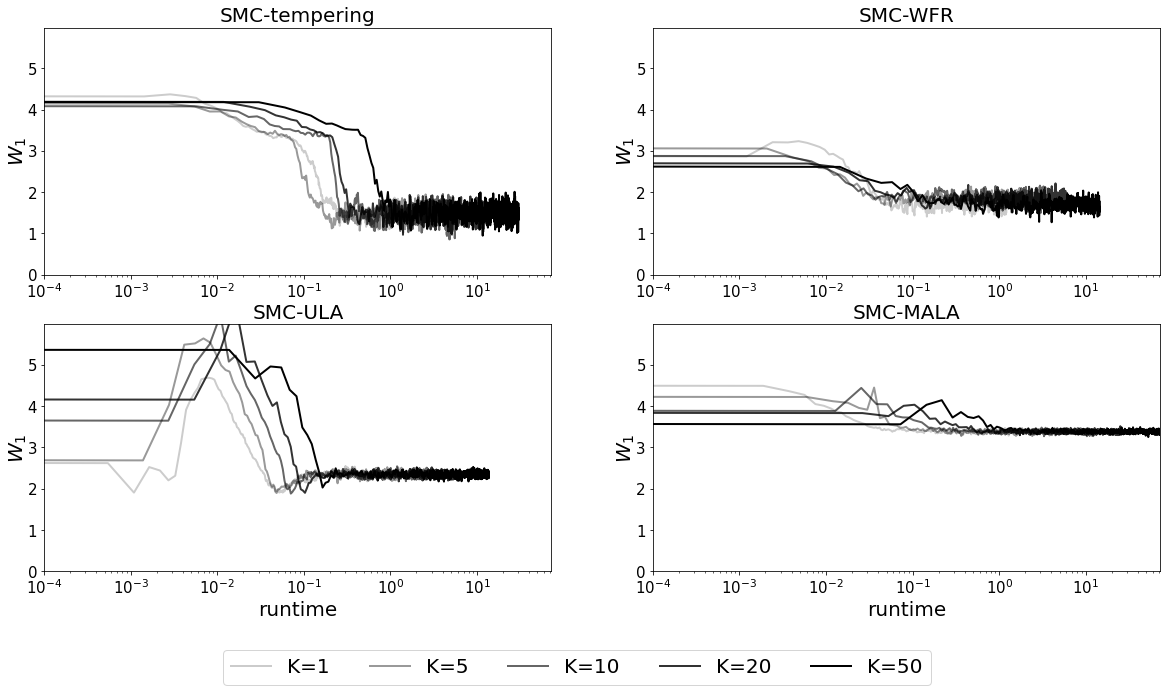

In [19]:
plt.figure(figsize = (20,10))

alphas = np.array([0.2, 0.4, 0.6, 0.8, 1])
for k in range(Ksize):
    nmcmc = Ks[k]
    xx_fr = avg_runtime[k, 0]/Niter_fr*np.arange(Niter_fr)
    xx_wfr = avg_runtime[k, 1]/Niter*np.arange(Niter)
    xx_smcula = avg_runtime[k, 2]/Niter_smcula*np.arange(Niter_smcula)
    xx_smcmala = avg_runtime[k, 3]/Niter_smcmala*np.arange(Niter_smcmala)
    
    w1_fr_plot = np.mean(np.mean(w1_fr[k, :], axis = 1), axis = 0)
    w1_wfr_plot = np.mean(np.mean(w1_wfr[k, :], axis = 1), axis = 0)
    w1_smcula_plot = np.mean(np.mean(w1_smcula[k, :], axis = 1), axis = 0)
    w1_smcmala_plot = np.mean(np.mean(w1_smcmala[k, :], axis = 1), axis = 0)
    
    plt.subplot(2, 2, 1)
    plt.title('SMC-tempering', fontsize = 20)
    plt.semilogx(xx_fr, w1_fr_plot, label = 'K='+str(nmcmc), lw = 2, c = 'black', alpha = alphas[k])
#     plt.xlabel('runtime', fontsize = 20)
    plt.ylabel('$W_1$', fontsize = 20, labelpad=-1)
    plt.xticks(fontsize=15);
    plt.yticks(fontsize=15);
    plt.xlim(0.0001, max(np.concatenate([xx_wfr, xx_fr, xx_smcula, xx_smcmala]))+0.01) 
    plt.ylim(0, max(np.concatenate([w1_fr_plot, w1_wfr_plot, w1_smcula_plot, w1_smcmala_plot]))+0.1) 
    plt.subplot(2, 2, 2)
    plt.title('SMC-WFR', fontsize = 20)
    plt.semilogx(xx_wfr, w1_wfr_plot, label = 'K='+str(nmcmc), lw = 2, c = 'black', alpha = alphas[k])
#     plt.xlabel('runtime', fontsize = 20)
    plt.ylabel('$W_1$', fontsize = 20, labelpad=-1)
    plt.xticks(fontsize=15);
    plt.yticks(fontsize=15);
    plt.xlim(0.0001, max(np.concatenate([xx_wfr, xx_fr, xx_smcula, xx_smcmala]))+0.01) 
    plt.ylim(0, max(np.concatenate([w1_fr_plot, w1_wfr_plot, w1_smcula_plot, w1_smcmala_plot]))+0.1) 
    plt.subplot(2, 2, 3)
    plt.title('SMC-ULA', fontsize = 20)
    plt.semilogx(xx_smcula, w1_smcula_plot, label = 'K='+str(nmcmc), lw = 2, c = 'black', alpha = alphas[k])
    plt.xlabel('runtime', fontsize = 20)
    plt.ylabel('$W_1$', fontsize = 20, labelpad=-1)
    plt.xticks(fontsize=15);
    plt.yticks(fontsize=15);
    plt.xlim(0.0001, max(np.concatenate([xx_wfr, xx_fr, xx_smcula, xx_smcmala]))+0.01) 
    plt.ylim(0, max(np.concatenate([w1_fr_plot, w1_wfr_plot, w1_smcula_plot, w1_smcmala_plot]))+0.1) 
    plt.subplot(2, 2, 4)
    plt.title('SMC-MALA', fontsize = 20)
    plt.semilogx(xx_smcmala, w1_smcmala_plot, label = 'K='+str(nmcmc), lw = 2, c = 'black', alpha = alphas[k])
    plt.xlabel('runtime', fontsize = 20)
    plt.ylabel('$W_1$', fontsize = 20, labelpad=-1)
    plt.xticks(fontsize=15);
    plt.yticks(fontsize=15);
    plt.xlim(0.0001, max(np.concatenate([xx_wfr, xx_fr, xx_smcula, xx_smcmala]))+0.01)
    plt.ylim(0, max(np.concatenate([w1_fr_plot, w1_wfr_plot, w1_smcula_plot, w1_smcmala_plot]))+0.1) 
    plt.legend(loc = 'lower center', bbox_to_anchor=(-.15, -0.5), ncol = 5, fontsize = 20)

# plt.savefig('gm2d_K_runtime.pdf', bbox_inches="tight")

In [20]:
w1_wfr_plot

array([5.88494331, 2.61228493, 2.33125433, 2.22502365, 2.24311945,
       2.07564336, 2.17764467, 2.01104057, 1.77908212, 1.92701094,
       1.76520084, 1.73234338, 1.73636787, 1.78999398, 1.83867537,
       1.75165299, 1.71381117, 1.8164029 , 1.70124438, 1.78824842,
       1.86277638, 1.69476659, 1.69321959, 1.65212608, 1.70232079,
       1.59263204, 1.755533  , 1.90974543, 1.88010542, 1.7594392 ,
       1.67043176, 1.60676621, 1.5530947 , 1.83306698, 1.76845086,
       1.74801836, 1.70133796, 1.54682206, 1.68457683, 1.68921715,
       1.675957  , 1.6416041 , 1.59021174, 1.58535215, 1.59321057,
       1.47484723, 1.53799071, 1.58422452, 1.77105301, 1.72600629,
       1.73671428, 1.86273026, 1.72219887, 1.71738028, 1.76692877,
       1.62974885, 1.75797713, 1.77777007, 1.63247986, 1.54543308,
       1.56093218, 1.56024826, 1.61997077, 1.66382794, 1.58475299,
       1.42899786, 1.73648314, 1.67333169, 1.3874244 , 1.55648278,
       1.75127804, 1.76844801, 1.79915004, 1.74893926, 1.64768

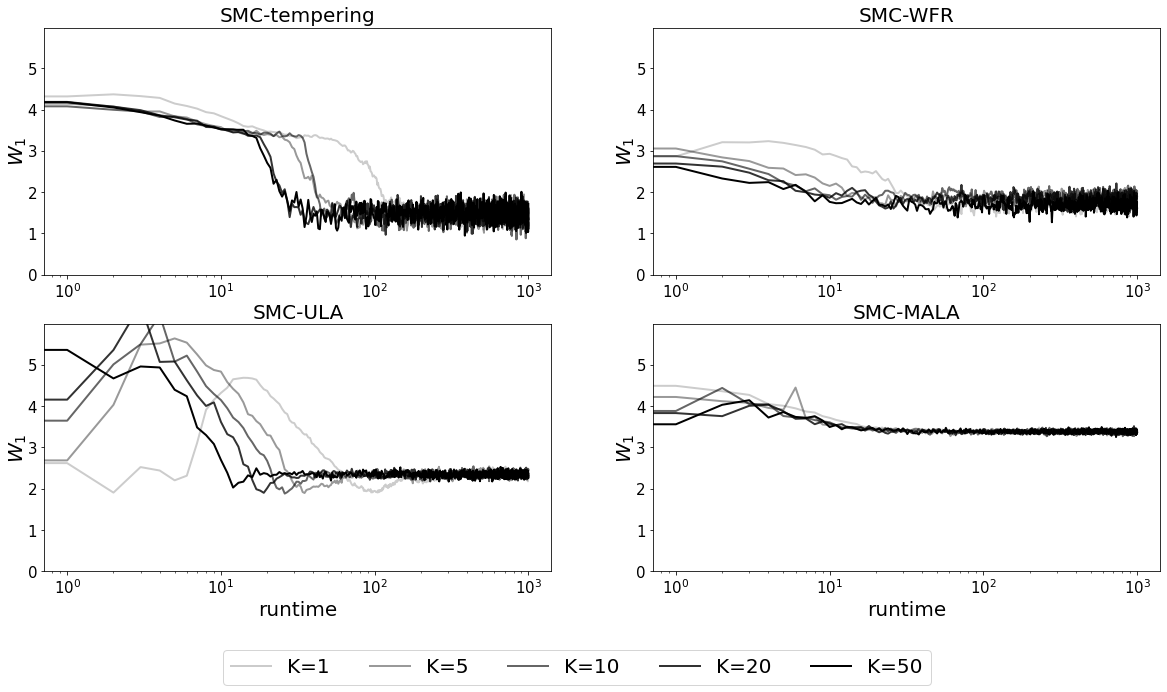

In [21]:
plt.figure(figsize = (20,10))

alphas = np.array([0.2, 0.4, 0.6, 0.8, 1])
for k in range(Ksize):
    nmcmc = Ks[k]
    xx_fr = avg_runtime[k, 0]/Niter_fr*np.arange(Niter_fr)
    xx_wfr = avg_runtime[k, 1]/Niter*np.arange(Niter)
    xx_smcula = avg_runtime[k, 2]/Niter_smcula*np.arange(Niter_smcula)
    xx_smcmala = avg_runtime[k, 3]/Niter_smcmala*np.arange(Niter_smcmala)
    
    w1_fr_plot = np.mean(np.mean(w1_fr[k, :], axis = 1), axis = 0)
    w1_wfr_plot = np.mean(np.mean(w1_wfr[k, :], axis = 1), axis = 0)
    w1_smcula_plot = np.mean(np.mean(w1_smcula[k, :], axis = 1), axis = 0)
    w1_smcmala_plot = np.mean(np.mean(w1_smcmala[k, :], axis = 1), axis = 0)
    
    plt.subplot(2, 2, 1)
    plt.title('SMC-tempering', fontsize = 20)
    plt.semilogx(w1_fr_plot, label = 'K='+str(nmcmc), lw = 2, c = 'black', alpha = alphas[k])
#     plt.xlabel('runtime', fontsize = 20)
    plt.ylabel('$W_1$', fontsize = 20, labelpad=-1)
    plt.xticks(fontsize=15);
    plt.yticks(fontsize=15);
    plt.ylim(0, max(np.concatenate([w1_fr_plot, w1_wfr_plot, w1_smcula_plot, w1_smcmala_plot]))+0.1) 
    plt.subplot(2, 2, 2)
    plt.title('SMC-WFR', fontsize = 20)
    plt.semilogx(w1_wfr_plot, label = 'K='+str(nmcmc), lw = 2, c = 'black', alpha = alphas[k])
#     plt.xlabel('runtime', fontsize = 20)
    plt.ylabel('$W_1$', fontsize = 20, labelpad=-1)
    plt.xticks(fontsize=15);
    plt.yticks(fontsize=15);
    plt.ylim(0, max(np.concatenate([w1_fr_plot, w1_wfr_plot, w1_smcula_plot, w1_smcmala_plot]))+0.1) 
    plt.subplot(2, 2, 3)
    plt.title('SMC-ULA', fontsize = 20)
    plt.semilogx(w1_smcula_plot, label = 'K='+str(nmcmc), lw = 2, c = 'black', alpha = alphas[k])
    plt.xlabel('runtime', fontsize = 20)
    plt.ylabel('$W_1$', fontsize = 20, labelpad=-1)
    plt.xticks(fontsize=15);
    plt.yticks(fontsize=15);
    plt.ylim(0, max(np.concatenate([w1_fr_plot, w1_wfr_plot, w1_smcula_plot, w1_smcmala_plot]))+0.1) 
    plt.subplot(2, 2, 4)
    plt.title('SMC-MALA', fontsize = 20)
    plt.semilogx(w1_smcmala_plot, label = 'K='+str(nmcmc), lw = 2, c = 'black', alpha = alphas[k])
    plt.xlabel('runtime', fontsize = 20)
    plt.ylabel('$W_1$', fontsize = 20, labelpad=-1)
    plt.xticks(fontsize=15);
    plt.yticks(fontsize=15);
    plt.ylim(0, max(np.concatenate([w1_fr_plot, w1_wfr_plot, w1_smcula_plot, w1_smcmala_plot]))+0.1) 
    plt.legend(loc = 'lower center', bbox_to_anchor=(-.15, -0.5), ncol = 5, fontsize = 20)

# plt.savefig('gm2d_K_iter.pdf', bbox_inches="tight")